In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
agricolture_classes_shp = gpd.read_file('..\\resources\\analisi_spaziale\\Analisi_spaziale_8classi.shp')
agricolture_classes_shp.head()

,COD_ISTAT,NOME_COMUN,DESCR_CLAS,SHAPE_AREA,SHAPE_LEN,geometry
0,108011.0,BRIOSCO,Aree urbane (significative),6.690579e+06,17350.022072,"POLYGON ((520951.787 5063653.852, 520847.161 5..."
1,97090.0,VIGANO`,Aree urbane (significative),1.599047e+06,6590.536792,"POLYGON ((526236.975 5062915.737, 526048.975 5..."
2,98041.0,MULAZZANO,Aree rurali,1.553880e+07,29233.101668,"POLYGON ((533685.415 5020537.281, 533634.938 5..."
3,97021.0,CESANA BRIANZA,Aree urbane,3.445101e+06,13567.023026,"POLYGON ((523466.092 5075175.161, 523468.466 5..."
4,17109.0,MONIGA DEL GARDA,Aree rurali in contesti urbani,1.585893e+07,23883.668273,"POLYGON ((627561.541 5043884.416, 627971.772 5..."


<AxesSubplot:>

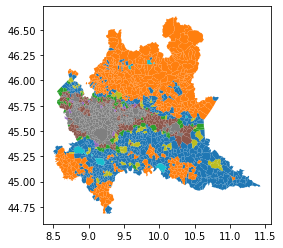

In [23]:
agricolture_classes_shp.to_crs(epsg=4326, inplace=True)
agricolture_classes_shp.plot(column='DESCR_CLAS')

In [4]:
population_shp = gpd.read_file('..\\resources\\residenti\\residenti_2017.shp')
population_shp.head()

,BELFIORE,NOME_COM,ISTAT,NOME_PRO,POP_2017,NUM_ABIT_S,SHAPE_AREA,SHAPE_LEN,geometry
0,D963,GEMONIO,12074,VARESE,2871.0,779.845333,3.681499e+06,10308.156007,"POLYGON ((473917.738 5079459.735, 473954.798 5..."
1,B187,BRIOSCO,108011,MONZA E DELLA BRIANZA,6020.0,899.772638,6.690579e+06,17350.017958,"POLYGON ((517973.677 5062702.439, 517974.427 5..."
2,B212,BRUGHERIO,108012,MONZA E DELLA BRIANZA,34516.0,3358.658638,1.027672e+07,21722.000318,"POLYGON ((520941.530 5044187.644, 520946.031 5..."
3,D239,CUVIO,12063,VARESE,1655.0,282.163912,5.865385e+06,15574.874765,"POLYGON ((477908.362 5082842.970, 477921.666 5..."
4,B729,CARATE BRIANZA,108015,MONZA E DELLA BRIANZA,17860.0,1795.614502,9.946456e+06,20939.207352,"POLYGON ((516473.604 5056819.518, 516469.479 5..."


<AxesSubplot:>

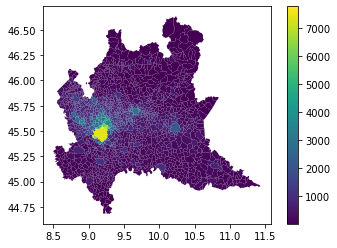

In [5]:
population_shp.to_crs(epsg=4326, inplace=True)
population_shp.plot(column='NUM_ABIT_S', legend=True)

In [6]:
import pandas as pd

agricolture_classes = pd.DataFrame(columns=['name', 'class' ])
agricolture_classes['name'] = agricolture_classes_shp['NOME_COMUN']
agricolture_classes['class'] = agricolture_classes_shp['DESCR_CLAS']
agricolture_classes.head()

,name,class
0,BRIOSCO,Aree urbane (significative)
1,VIGANO`,Aree urbane (significative)
2,MULAZZANO,Aree rurali
3,CESANA BRIANZA,Aree urbane
4,MONIGA DEL GARDA,Aree rurali in contesti urbani


In [7]:
pop_density = pd.DataFrame(columns=['name', 'pop_density' ])
pop_density['name'] = population_shp['NOME_COM']
pop_density['pop_density'] = population_shp['NUM_ABIT_S']
pop_density.head()

,name,pop_density
0,GEMONIO,779.845333
1,BRIOSCO,899.772638
2,BRUGHERIO,3358.658638
3,CUVIO,282.163912
4,CARATE BRIANZA,1795.614502


In [8]:
agricolture_classes['name'] = agricolture_classes['name'].apply(lambda name: name.upper())
pop_density['name'] = pop_density['name'].apply(lambda name: name.upper())

In [9]:
# agricolture_classes.sort_values(by=['name'], inplace=True)
# pop_density.sort_values(by=['name'], inplace=True)

In [21]:
table = pd.merge(agricolture_classes, pop_density, how='inner', on=['name'])
table.head()

,name,class,pop_density
0,BRIOSCO,Aree urbane (significative),899.772638
1,VIGANO`,Aree urbane (significative),1304.204145
2,MULAZZANO,Aree rurali,369.140411
3,CESANA BRIANZA,Aree urbane,705.711411
4,MONIGA DEL GARDA,Aree rurali in contesti urbani,160.414322


In [11]:
population_shp['class'] = table['class']

In [12]:
comuni = gpd.read_file('..\\resources\\comuni\\coordinate\\comuni_shp\\features-points.shp')
comuni.head()

,Name,descriptio,geometry
0,Abbadia Cerreto,None,POINT (9.59416 45.31217)
1,Abbadia Lariana,None,POINT (9.33414 45.90048)
2,Abbiategrasso,None,POINT (8.91854 45.40077)
3,Acquafredda,None,POINT (10.41468 45.30738)
4,Acquanegra Cremonese,None,POINT (9.89087 45.17037)


<AxesSubplot:>

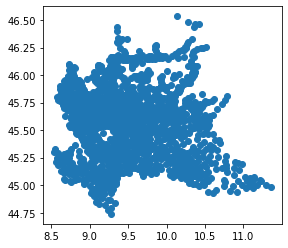

In [13]:
comuni.plot()

In [14]:
comuni_coords = pd.DataFrame(columns=['name', 'latitude', 'longitude'])
comuni_coords['name'] = comuni['Name']
comuni_coords['point'] = comuni['geometry']
comuni_coords.head()

,name,latitude,longitude,point
0,Abbadia Cerreto,NaN,NaN,POINT (9.59416 45.31217)
1,Abbadia Lariana,NaN,NaN,POINT (9.33414 45.90048)
2,Abbiategrasso,NaN,NaN,POINT (8.91854 45.40077)
3,Acquafredda,NaN,NaN,POINT (10.41468 45.30738)
4,Acquanegra Cremonese,NaN,NaN,POINT (9.89087 45.17037)


In [15]:
comuni_coords['longitude'] = comuni_coords['point'].apply(lambda point: round(float(point.bounds[0]), 2))
comuni_coords['latitude'] = comuni_coords['point'].apply(lambda point: round(float(point.bounds[1]), 2))
comuni_coords.drop(columns='point', inplace=True)
comuni_coords

,name,latitude,longitude
0,Abbadia Cerreto,45.31,9.59
1,Abbadia Lariana,45.90,9.33
2,Abbiategrasso,45.40,8.92
3,Acquafredda,45.31,10.41
4,Acquanegra Cremonese,45.17,9.89
...,...,...,...
1539,Zerbolo,45.21,9.01
1540,Zibido San Giacomo,45.37,9.12
1541,Zinasco,45.13,9.03
1542,Zogno,45.79,9.66


In [16]:
comuni_coords['name'] = comuni_coords['name'].apply(lambda name: name.upper())

table = pd.merge(table, comuni_coords, how='inner', on=['name'])
table.head()

,name,class,pop_density,latitude,longitude
0,BRIOSCO,Aree urbane (significative),899.772638,45.71,9.24
1,MULAZZANO,Aree rurali,369.140411,45.37,9.40
2,CESANA BRIANZA,Aree urbane,705.711411,45.82,9.30
3,MONIGA DEL GARDA,Aree rurali in contesti urbani,160.414322,45.53,10.54
4,MONTICELLI BRUSATI,Aree urbane in contesti rurali,417.215618,45.63,10.10


In [17]:
population_shp['class'] = np.nan
population_shp['weighted_class'] = np.nan

In [18]:
for i in range(len(population_shp)):
    name = population_shp['NOME_COM'][i]
    agr_class = table[table['name'] == name]['class']
    if len(agr_class) > 0:
        population_shp['class'][i] = agr_class.item()  
        population_shp['weighted_class'][i] = population_shp['NUM_ABIT_S'][i] if agr_class.item().lower() == 'aree rurali' else np.nan
        

In [22]:
population_shp.head()

,BELFIORE,NOME_COM,ISTAT,NOME_PRO,POP_2017,NUM_ABIT_S,SHAPE_AREA,SHAPE_LEN,geometry,class,weighted_class
0,D963,GEMONIO,12074,VARESE,2871.0,779.845333,3.681499e+06,10308.156007,"POLYGON ((8.66396 45.86821, 8.66443 45.86874, ...",Aree urbane,NaN
1,B187,BRIOSCO,108011,MONZA E DELLA BRIANZA,6020.0,899.772638,6.690579e+06,17350.017958,"POLYGON ((9.23095 45.71764, 9.23096 45.71789, ...",Aree urbane (significative),NaN
2,B212,BRUGHERIO,108012,MONZA E DELLA BRIANZA,34516.0,3358.658638,1.027672e+07,21722.000318,"POLYGON ((9.26829 45.55091, 9.26835 45.55102, ...",Aree urbane (significative),NaN
3,D239,CUVIO,12063,VARESE,1655.0,282.163912,5.865385e+06,15574.874765,"POLYGON ((8.71522 45.89880, 8.71539 45.89883, ...",Aree rurali,282.163912
4,B729,CARATE BRIANZA,108015,MONZA E DELLA BRIANZA,17860.0,1795.614502,9.946456e+06,20939.207352,"POLYGON ((9.21147 45.66473, 9.21142 45.66506, ...",Aree urbane (significative),NaN


<AxesSubplot:>

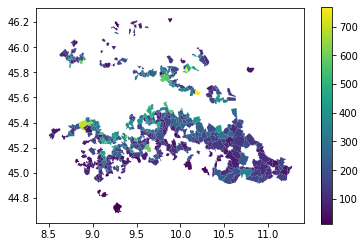

In [19]:
population_shp.plot(column='weighted_class', legend=True)

In [20]:
# uso_suolo = gpd.read_file('..\\resources\\uso_suolo\\uso_suolo.shp')